<a href="https://colab.research.google.com/github/Nhat25496/Nhat25496/blob/Transim/mRNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Nhat25496/Nhat25496/Transim/raw_1661_data_1.csv')
df_ML=pd.read_csv('https://raw.githubusercontent.com/Nhat25496/Nhat25496/Transim/new_data_ver1.csv')

In [ ]:
print(df.head())
#print(df.loc[:,['uAUG','pro/micro']])

    Name Start Stop  5UTR length  ... pro/micro  Protein    Col1    Col2
0  b0008   ATG  TAA           47  ...  2.124338  1591.00    72.0   700.0
1  b0014   ATG  TAA           19  ...  2.331224  2657.00    26.0   130.0
2  b0019   GTG  TGA           31  ... -0.207450     3.98  1127.0  1276.0
3  b0023   TTG  TAA          132  ...  2.051501  1190.00   107.0    35.0
4  b0025   ATG  TAA           24  ...  0.371540    22.20   870.0  1053.0

[5 rows x 23 columns]


In [ ]:
def annotate_p(col1, col2, y, height, text):
  plt.plot([col1, col1, col2, col2],[y, y+height, y+height, y], lw=1, c='black')
  plt.text((col1+col2)*0.5, y+height, text, ha='center', va='bottom')
  return

In [ ]:
print(df[['uAUG', 'Start', 'Stop', 'Half-life', 'Type']])
category_lst=pd.melt(df[['uAUG', 'Start', 'Stop', 'Half-life', 'Type']])
print(category_lst)

          uAUG Start Stop Half-life        Type
0         free   ATG  TAA   10hours  first gene
1         free   ATG  TAA   10hours  first gene
2         free   GTG  TGA      2min  first gene
3         free   TTG  TAA   10hours  first gene
4         free   ATG  TAA      2min  first gene
...        ...   ...  ...       ...         ...
1655  outframe   GTG  TGA   10hours   in operon
1656      free   ATG  TAA   10hours   in operon
1657      free   ATG  TGA      2min   in operon
1658      free   ATG  TAA      2min   in operon
1659      free   ATG  TAA   10hours   in operon

[1660 rows x 5 columns]
     variable      value
0        uAUG       free
1        uAUG       free
2        uAUG       free
3        uAUG       free
4        uAUG       free
...       ...        ...
8295     Type  in operon
8296     Type  in operon
8297     Type  in operon
8298     Type  in operon
8299     Type  in operon

[8300 rows x 2 columns]


In [ ]:
def category_sep(cond_column, cat_lst):
  return [df.loc[df[cond_column]==tag, ['pro/micro']] for tag in cat_lst]
def ttest_lst(column_lst, name_lst):
  print(name_lst)
  result_lst=[]
  for i in range(len(column_lst)):
    j=i+1
    while j<len(column_lst):
      result=stats.ttest_ind(column_lst[i], column_lst[j])
      print('%s-%s p-value two-tail=%s p-value one-tails=%s' %(name_lst[i], name_lst[j], result[1][0], result[1][0]/2))
      result_lst.append(result[1][0])
      j+=1
  return


In [ ]:
#Ttest start
lst=['ATG', 'GTG', 'TTG']
start_lst=category_sep('Start', lst)
print([len(column) for column in start_lst])
ttest_lst(start_lst, lst)

print('ATG-GTG', stats.ttest_ind(start_lst[0], start_lst[1])[1][0]/2)





[1491, 136, 33]
['ATG', 'GTG', 'TTG']
ATG-GTG p-value one-tail=0.028436530075415977 p-value two-tails=0.014218265037707989
ATG-TTG p-value one-tail=0.08131965124633578 p-value two-tails=0.04065982562316789
GTG-TTG p-value one-tail=0.5635813187213623 p-value two-tails=0.28179065936068115
ATG-GTG 0.014218265037707989


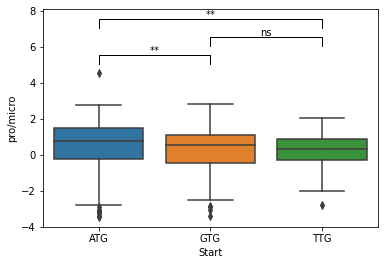

In [ ]:
#Start plot
category_lst=pd.melt(df[['uAUG', 'Start', 'Stop', 'Half-life', 'Type']])
ax = sns.boxplot(x='Start', y='pro/micro',data=df)
#ax1 = sns.boxplot(x='Start', y='pro/micro',data=df)
# statistical annotation
x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df['pro/micro'].max(), 1, 'k'

annotate_p(0, 1, df['pro/micro'].max()+0.5, 0.5, '**')
annotate_p(0, 2, df['pro/micro'].max()+2.5, 0.5, '**')
annotate_p(1, 2, df['pro/micro'].max()+1.5, 0.5, 'ns')


plt.show(ax)

1509
['free', 'inframe', 'outframe']
free-inframe p-value one-tail=0.4344879187941 p-value two-tails=0.21724395939705
free-outframe p-value one-tail=0.08773226803781764 p-value two-tails=0.04386613401890882
inframe-outframe p-value one-tail=0.10557931562667575 p-value two-tails=0.05278965781333787
None


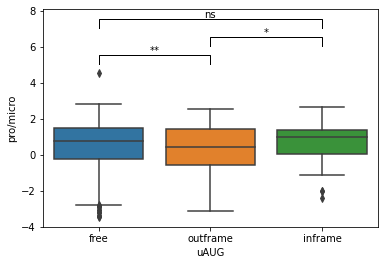

In [ ]:
#ttest uAUG

uAUG_lst=category_sep('uAUG', ['free', 'inframe', 'outframe'])
print(len(uAUG_lst[0]))

result= ttest_lst(uAUG_lst, ['free', 'inframe', 'outframe'])
#print('free-outframe: ',stats.ttest_ind(uAUG_lst[0], uAUG_lst[2])[1])
print(result)
ax = sns.boxplot(x='uAUG', y='pro/micro',data=df)
annotate_p(0, 1, df['pro/micro'].max()+0.5, 0.5, '**')
annotate_p(0, 2, df['pro/micro'].max()+2.5, 0.5, 'ns')
annotate_p(1, 2, df['pro/micro'].max()+1.5, 0.5, '*')

In [ ]:
#ttest Stop
lst=['TAA', 'TGA', 'TAG']
stop_list=category_sep('Stop', lst)
ttest_lst(stop_list, lst)
print([len(column) for column in stop_list])

['TAA', 'TGA', 'TAG']
TAA-TGA p-value two-tail=1.9281601357529837e-09 p-value one-tails=9.640800678764919e-10
TAA-TAG p-value two-tail=5.923190531508954e-08 p-value one-tails=2.961595265754477e-08
TGA-TAG p-value two-tail=0.021089709718375312 p-value one-tails=0.010544854859187656
[1157, 420, 83]


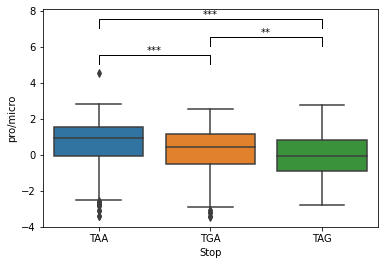

In [ ]:
#boxplot
category_lst=pd.melt(df[['Stop', 'Start', 'Stop', 'Half-life', 'Type']])
ax = sns.boxplot(x='Stop', y='pro/micro',data=df)
#ax1 = sns.boxplot(x='Start', y='pro/micro',data=df)
# statistical annotation
x1, x2 = 1, 2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = df['pro/micro'].max(), 1, 'k'

annotate_p(0, 1, df['pro/micro'].max()+0.5, 0.5, '***')
annotate_p(0, 2, df['pro/micro'].max()+2.5, 0.5, '***')
annotate_p(1, 2, df['pro/micro'].max()+1.5, 0.5, '**')


plt.show(ax)

In [ ]:
subset=df_ML.loc[:,['predicted_pro/micro','pro/micro']]
stats.spearmanr(subset)


SpearmanrResult(correlation=0.6535718145325996, pvalue=7.73597513277922e-203)

Ttest_indResult(statistic=array([3.76670841]), pvalue=array([0.00017119]))


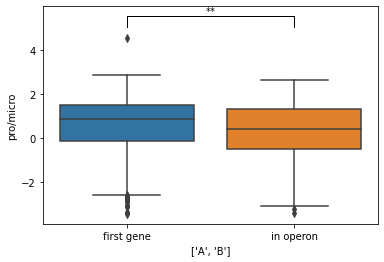

In [ ]:
lst=['first gene', 'in operon']
type_list=category_sep('Type', lst)
print(stats.ttest_ind(type_list[0], type_list[1]))
ax = sns.boxplot(x='Type', y='pro/micro', data=df).set(xlabel=['A', 'B'])
annotate_p(0, 1, df['pro/micro'].max()+0.5, 0.5, '**')

Ttest_indResult(statistic=array([-3.43107036]), pvalue=array([0.00061596]))


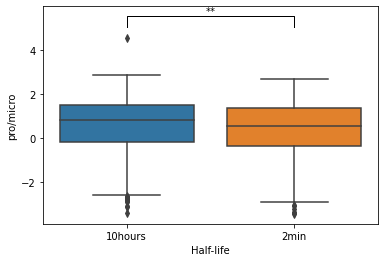

In [ ]:
lst=['2min', '10hours']
type_list=category_sep('Half-life', lst)
print(stats.ttest_ind(type_list[0], type_list[1]))
ax = sns.boxplot(x='Half-life', y='pro/micro',data=df)
annotate_p(0, 1, df['pro/micro'].max()+0.5, 0.5, '**')